<a href="https://colab.research.google.com/github/mapmatters/coursera-nlp/blob/main/nlp_class_1_Week3_nb04_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/coursera/nlp')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 data
'nlp class 1 - Week1 - nb01'
'nlp class 1 - Week1 - nb02'
'nlp class 1 - Week1 - nb03'
'nlp class 1 - Week1 - nb04 - assignment'
'nlp class 1 - Week2 - nb01'
'nlp class 1 - Week2 - nb02 - assignment'
'nlp class 1 - Week3 - nb01 - linear algebra'
'nlp class 1 - Week3 - nb02- manipulating word embedding'
'nlp class 1 - Week3 - nb03- PCA.ipynb'
'nlp class 1 - Week3 - nb04 - assignment'
 py
 __pycache__


## Import data

In [25]:
# Run this cell to import packages.
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from utils import get_vectors

In [26]:
def get_vectors(embeddings, words):
    """
    Input:
        embeddings: a word 
        fr_embeddings:
        words: a list of words
    Output: 
        X: a matrix where the rows are the embeddings corresponding to the rows on the list
        
    """
    m = len(words)
    X = np.zeros((1, 300))
    for word in words:
        english = word
        eng_emb = embeddings[english]
        X = np.row_stack((X, eng_emb))
    X = X[1:,:]
    return X

In [27]:
data = pd.read_csv('data/capital.csv', delimiter=',')
data.columns = ['num','city1', 'country1', 'city2', 'country2']
data = data[['city1', 'country1', 'city2', 'country2']]

# print first five elements in the DataFrame
data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


### To Run This Code On Your Own Machine:
Note that because the original google news word embedding dataset is about 3.64 gigabytes,
the workspace is not able to handle the full file set.  So we've downloaded the full dataset,
extracted a sample of the words that we're going to analyze in this assignment, and saved
it in a pickle file called `word_embeddings_capitals.p`

If you want to download the full dataset on your own and choose your own set of word embeddings,
please see the instructions and some helper code.

- Download the dataset from this [page](https://code.google.com/archive/p/word2vec/).
- Search in the page for 'GoogleNews-vectors-negative300.bin.gz' and click the link to download.

```python
import nltk
from gensim.models import KeyedVectors


# embeddings = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300_shortcut.bin.gz', binary = True)
embeddings = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary = True)
f = open('data/capital.csv', 'r').read()
set_words = set(nltk.word_tokenize(f))
select_words = words = ['king', 'queen', 'oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
for w in select_words:
    set_words.add(w)

def get_word_embeddings(embeddings):

    word_embeddings = {}
    for word in embeddings.vocab:
        if word in set_words:
            word_embeddings[word] = embeddings[word]
    return word_embeddings


# Testing your function
word_embeddings = get_word_embeddings(embeddings)
print(len(word_embeddings))
pickle.dump( word_embeddings, open( "data/word_embeddings_subset.p", "wb" ) )
```

In [32]:
word_embeddings = pickle.load(open("data/word_embeddings_subset.p", "rb"))
len(word_embeddings)  # there should be 243 words that will be used in this assignment

243

In [33]:
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

dimension: 300


# predict relationship - cosine similarity

In [34]:
def cosine_similarity(A, B):
  '''
  input 
    A: numpy array corresponds to a word vector
    B: numpy array corresponds to a word vector
  output
    cos: numerical number... cosine similarity
  '''

  dot = np.dot(A, B)
  norma = np.linalg.norm(A)
  normb = np.linalg.norm(B)
  cos = dot/(norma*normb)
  
  return cos

In [35]:
king = word_embeddings['king']
queen = word_embeddings['queen']
cosine_similarity(king, queen)

0.6510956

# Euclidean distance

In [18]:
def euclidean(A, B):
  d = np.sum((A-B)**2)**(1/2)
  return d

In [19]:
euclidean(king, queen)

2.479692376654192

# Finding the country of each capital
1. Athens
2. Greece
3. Baghdad
task = predict 'Iraq'

In [22]:
def get_country(city1, country1, city2, embeddings):
  '''
  input:
    city1
    country1
    city2 
    embeddings
  output:
    countries
  '''
  # store the city1, country1, city2 in a set called group
  group = set((city1, country1, city2))

  # get embeddings 
  city1_emb = embeddings[city1]
  country1_emb = embeddings[country1]
  city2_emb = embeddings[city2]

  # get embedding of country 2
  vec = country1_emb - city1_emb + city2_emb

  similarity = -1
  country = ''

  # loop through all words in the embeddings dict
  for word in embeddings.keys():
    if word not in group:
      word_emb = embeddings[word]
      cur_similarity = cosine_similarity(word_emb, vec)
      if cur_similarity > similarity:
        similarity = cur_similarity
        country = (word, cur_similarity)

  return country


In [23]:
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

# Accuracy

In [36]:
data

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt
...,...,...,...,...
4946,Zagreb,Croatia,Dakar,Senegal
4947,Zagreb,Croatia,Damascus,Syria
4948,Zagreb,Croatia,Dhaka,Bangladesh
4949,Zagreb,Croatia,Doha,Qatar


In [54]:
for i, row in data.iterrows():
  # print(i)
  # print(row)
  a = row['city1']
  # print(type(row))
  if i > 0:
    # return a  
    break;
a


'Athens'

In [55]:
def get_accuracy(word_embeddings, data):
  '''
  input
    word_embeddings
    data: pandas dataframe
  output
    accuracy
  '''

  num_correct = 0
  for i, row in data.iterrows():
    city1 = row['city1']
    country1 = row['country1']
    
    city2 = row['city2']
    country2 = row['country2']

    predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)

    if predicted_country2 == country2:
      num_correct += 1
  m = len(data)

  accuracy = num_correct / m
  return accuracy


In [56]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


# Plotting the vectors using PCA

- mean normalize the data
- compute the covariance matrix of your data
- compute the eigenvectors and the eigenvalues of your covariance matrix
- multiply the first K eigenvectors by your normalized data

**Instructions**: 

You will write a program that takes in a data set where each row corresponds to a word vector. 
* The word vectors are of dimension 300. 
* Use PCA to change the 300 dimensions to `n_components` dimensions. 
* The new matrix should be of dimension `m, n_componentns`. 

* First de-mean the data
* Get the eigenvalues using `linalg.eigh`.  Use `eigh` rather than `eig` since R is symmetric.  The performance gain when using `eigh` instead of `eig` is substantial.
* Sort the eigenvectors and eigenvalues by decreasing order of the eigenvalues.
* Get a subset of the eigenvectors (choose how many principle components you want to use using `n_components`).
* Return the new transformation of the data by multiplying the eigenvectors with the original data.

In [203]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    """

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # mean center the data
    X_demeaned = X - np.mean(X, axis=0)

    # calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')
    # eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)
    print(eigen_vals)
    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    print(idx_sorted)
    
    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing =  idx_sorted[::-1]

    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing] 

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing] 

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    eigen_vecs_subset = eigen_vecs_sorted[:,:n_components] 

    # transform the data by multiplying the transpose of the eigenvectors 
    # with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.dot(X_demeaned, eigen_vecs_subset)

    ### END CODE HERE ###

    return X_reduced


In [204]:
# Testing your function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

[-6.64396319e-17 -1.55854519e-17 -9.21522981e-18 -2.56689420e-18
  3.86692031e-19  4.43319142e-18  4.53021184e-17  7.57775903e-17
  2.50881048e-01  5.48501886e-01]
[0 1 2 3 4 5 6 7 8 9]
Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


In [206]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
XX = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', XX.shape)
# We have done the plotting for you. Just run this cell.
result = compute_pca(XX, 2)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)
[-5.30275932e-16 -4.69531692e-16 -4.57848709e-16 -4.06120894e-16
 -3.86511589e-16 -3.11487715e-16 -3.02782930e-16 -2.74735293e-16
 -2.72411405e-16 -2.36254435e-16 -2.08075202e-16 -2.06084037e-16
 -1.61328320e-16 -1.49676975e-16 -1.41329634e-16 -1.33813522e-16
 -1.28462136e-16 -1.18182255e-16 -1.15738601e-16 -1.08024492e-16
 -1.02406602e-16 -9.74456173e-17 -9.36685152e-17 -9.20054161e-17
 -8.81362459e-17 -8.61478180e-17 -8.17165513e-17 -7.73963116e-17
 -7.51889501e-17 -7.34089198e-17 -6.49890197e-17 -6.27489803e-17
 -6.18020545e-17 -5.61717209e-17 -5.26973351e-17 -5.20239581e-17
 -5.04943235e-17 -4.90660320e-17 -4.79262196e-17 -4.66486734e-17
 -4.64767626e-17 -4.62610768e-17 -4.50308879e-17 -4.24177436e-17
 -4.20180112e-17 -4.11916144e-17 -4.09656289e-17 -4.02005642e-17
 -3.91412909e-17 -3.75915941e-17 -3.72428579e-17 -3.71197013e-17
 -3.63135501e-17 -3.58214990e-17 -3.57029091e-17 -3.38124892e-17
 -3.18752993e-17 -3.15

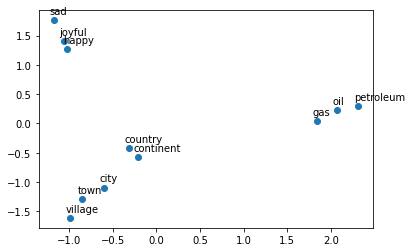

In [207]:
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))
plt.show()

In [208]:
np.random.seed(125555)
X = np.random.rand(11, 300)
n_components=2

X_demeaned = X - np.mean(X, axis=0)

# calculate the covariance matrix
covariance_matrix = np.cov(X_demeaned, rowvar=False)

# calculate eigenvectors & eigenvalues of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)
print(eigen_vals)
# sort eigenvalue in increasing order (get the indices from the sort)
idx_sorted = np.argsort(eigen_vals)
print(idx_sorted)

# reverse the order so that it's from highest to lowest.
idx_sorted_decreasing = idx_sorted[::-1]
print(idx_sorted_decreasing)

# sort the eigen values by idx_sorted_decreasing
eigen_vals_sorted = eigen_vals[idx_sorted_decreasing] 
print(eigen_vals_sorted)

# sort eigenvectors using the idx_sorted_decreasing indices
eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing] 
# print(eigen_vecs_sorted)

# select the first n eigenvectors (n is desired dimension
# of rescaled data array, or dims_rescaled_data)
eigen_vecs_subset = eigen_vecs_sorted[:,:n_components] 
print(eigen_vecs_subset)

# transform the data by multiplying the transpose of the eigenvectors 
# with the transpose of the de-meaned data
# Then take the transpose of that product.
X_reduced = np.dot(eigen_vecs_subset.T, X_demeaned.T).T
X_reduced

[-1.70018151e-15 -1.40496086e-15 -1.15045052e-15 -1.06095175e-15
 -1.03254944e-15 -8.95636519e-16 -7.67803411e-16 -7.59489894e-16
 -6.58354566e-16 -5.93040148e-16 -5.79308372e-16 -5.15734577e-16
 -4.60922118e-16 -4.18864242e-16 -4.09312081e-16 -3.98507584e-16
 -3.71358314e-16 -3.43631792e-16 -3.30130404e-16 -3.17034551e-16
 -2.88447976e-16 -2.81320420e-16 -2.73302198e-16 -2.71816769e-16
 -2.53301519e-16 -2.44919813e-16 -2.18315764e-16 -2.12077583e-16
 -2.06384041e-16 -2.00382671e-16 -1.85303229e-16 -1.74889560e-16
 -1.72216993e-16 -1.70407159e-16 -1.64376804e-16 -1.55154366e-16
 -1.49801535e-16 -1.47530597e-16 -1.47342070e-16 -1.45171183e-16
 -1.44971497e-16 -1.43723581e-16 -1.42847858e-16 -1.38102392e-16
 -1.33146460e-16 -1.31841325e-16 -1.30480387e-16 -1.27551849e-16
 -1.26738183e-16 -1.25822948e-16 -1.20920606e-16 -1.20740696e-16
 -1.17374510e-16 -1.15716600e-16 -1.13769604e-16 -1.13738063e-16
 -1.11360059e-16 -1.11160834e-16 -1.09025411e-16 -1.08923016e-16
 -1.08170690e-16 -1.04934

array([[ 0.77667254,  1.05650981],
       [ 2.62479981, -2.16008091],
       [ 0.43558648,  1.94220672],
       [-1.51696174, -1.3455817 ],
       [-0.3751596 , -0.36431917],
       [-2.47475854, -2.69334136],
       [ 1.88128122, -2.0310489 ],
       [ 1.17755703,  2.00001287],
       [-3.5342847 ,  1.2864359 ],
       [ 0.38333176,  1.10529175],
       [ 0.62193574,  1.20391498]])

In [209]:
eigen_vecs.shape
print(eigen_vecs_subset.shape)

(300, 2)


In [152]:
X_reduced

array([[-3.08780779e-16,  6.17561557e-16],
       [ 1.14491749e-16,  0.00000000e+00],
       [ 4.99600361e-16, -1.66533454e-16],
       [ 4.92661467e-16, -9.71445147e-17],
       [ 3.46944695e-16, -4.99600361e-16],
       [ 2.77555756e-17, -2.22044605e-16],
       [ 8.32667268e-17,  6.07153217e-17],
       [-8.32667268e-17,  4.71844785e-16],
       [-9.71445147e-17, -4.37150316e-16],
       [ 9.02056208e-17,  4.44089210e-16],
       [-9.71445147e-17,  2.77555756e-17]])